### Exploration  of Bayesian Update using Coin Flip Example

In [68]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [69]:
# Hypothesis space: possible biases on the coin
biases = np.linspace(0,1,100)
# Actual bias on coin. .5 is fair.   .8 is 80% heads, etc.
true_bias = 0.8

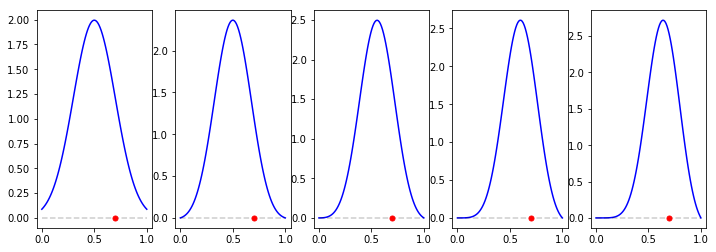

In [73]:
# Uncomment one of these lines to select a prior
# prior = 2 - stats.norm.pdf(biases,true_bias,.2) # "Upside down" around true bias. A kind of worst case
prior = stats.norm.pdf(biases,.5,.2) # Gaussian around .5
# prior = stats.uniform.pdf(biases) # Uniform


num_iterations = 5 # Iterations of Bayesian update. TODO: Allow for grid
n_flips = 1 # Number of coin flips at each iteration

fig = plt.gcf()
fig.set_size_inches(12,4)

# Do num_iterations of Bayesian update
for i in range(num_iterations):
    
    # Flip the coin n_flips times.
    flips = stats.bernoulli.rvs(true_bias, size=n_flips)
    num_heads = flips.sum()
    
    # Compute the likelihood.  p(D|H) 
    likelihood = stats.binom.pmf(num_heads, n_flips, biases)
    
    # Increment subplot
    plt.subplot(1, num_iterations, i+1)

    # Plot initial prior: p(H)
    if i == 0:
        plt.plot(biases,prior,'b')

    # Bayes! Compute posterior: p(H|D) = p(H)p(D|H)/p(E)
    posterior = (prior*likelihood)/np.trapz(prior*likelihood,biases)

    # Plot posterior
    if (i > 0):
        plt.plot(biases,posterior, 'b')

    # Plot the true bias
    ymin,ymax = plt.ylim()
    plt.plot([0,1],[0,0],'k--', alpha=.2)
    plt.plot(true_bias, 0, '.r', markersize=10)

    # Set the prior for the next iteration to be the curent posterior
    prior = posterior 
